In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
df = pd.read_csv('/content/diabetes.csv')
print('Емельянов')

Емельянов


In [ ]:
print(df.head())
print('Емельянов')

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   Pedigree  Age  Outcome  
0     0.627   50        1  
1     0.351   31        0  
2     0.672   32        1  
3     0.167   21        0  
4     2.288   33        1  
Емельянов


regnancies
Описание: Количество беременностей у пациента.
Тип данных: Целое число (integer).


Glucose
Описание: Уровень глюкозы в крови натощак.
Тип данных: Целое число (integer).


BloodPressure
Описание: Диастолическое артериальное давление.
Тип данных: Целое число (integer).

SkinThickness
Описание: Толщина кожной складки на трицепсе.
Тип данных: Целое число.


Insulin
Описание: Уровень инсулина в сыворотке
Тип данных: Целое число.

BMI (Body Mass Index)
Описание: Индекс массы тела, рассчитанный как вес.
Тип данных: Дробное число (float).

Pedigree
Описание: Диабетический родословный коэффициент, отражающий влияние наследственности на вероятность развития диабета.
Тип данных: Дробное число (float).

Age
Описание: Возраст пациента
Тип данных: Целое число (integer).

Outcome
Описание: Наличие или отсутствие диабета у пациента.
0: Отсутствует диабет.
1: Диабет диагностирован.
Тип данных: Целое число (integer).


In [ ]:
print(df.isnull().sum())
print('Емельянов')

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64
Емельянов


In [ ]:
print(df.isna().sum())
print('Емельянов')

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64
Емельянов


In [ ]:
print(df['Outcome'].value_counts())
print('Емельянов')

Outcome
0    500
1    268
Name: count, dtype: int64
Емельянов


Емельянов


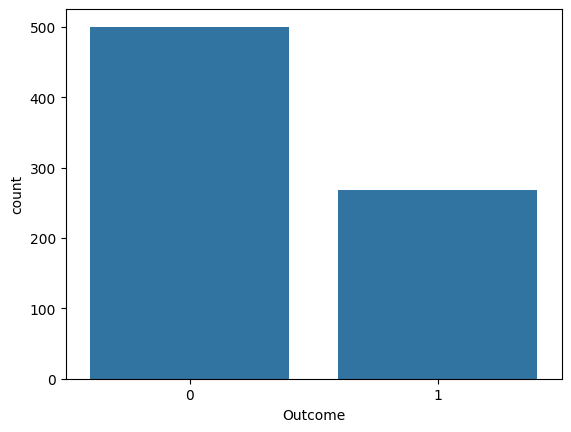

In [ ]:
sns.countplot(x='Outcome', data=df)
print('Емельянов')

В данном случае выборка содержит 500 и 250 элементов для двух классов, что означает соотношение 2:1. Критичным дисбаланс считается при соотношении классов, как правило, от 1:5 и выше (например, 1:10, 1:20 и т.д.).


In [ ]:
X = df.drop(columns = 'Outcome')
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Емельянов')

Емельянов


In [ ]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
res = log_reg.predict(X_test)
print(confusion_matrix(y_test, res))
print('Емельянов')

[[78 21]
 [18 37]]
Емельянов


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(classification_report(y_test, res))
print('Емельянов')

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

Емельянов


Класс 0:
Точность (precision) — 0.81, полнота (recall) — 0.79, F1-мера — 0.80.
Модель хорошо справляется с определением класса 0, достигая высокой точности и полноты.
Класс 1:
Точность — 0.64, полнота — 0.67, F1-мера — 0.65.
Хотя точность для класса 1 ниже, модель справляется с его классификацией приемлемо. Доля класса 1 в выборке позволяет модели улавливать его признаки без значительных ошибок.
Общая точность — 0.75.
Вывод: Логистическая регрессия дает хорошие результаты для обоих классов, при этом слегка уступая в точности для класса 1, что может быть связано с его меньшим количеством примеров. Однако модель достаточно устойчива для задачи.

In [ ]:
svc_params = {
    'C': [0.1, 1, 10, 100],                # Коэффициент регуляризации
    'kernel': ['linear', 'poly', 'rbf'],    # Тип ядра

}

supp_vector_model = SVC()
grid_search_supp_vector_model = GridSearchCV(supp_vector_model, svc_params, cv=6)
grid_search_supp_vector_model.fit(X_train, y_train)
best_supp_vector_model = grid_search_supp_vector_model.best_estimator_
res_svc = best_supp_vector_model.predict(X_test)
confusion_matrix(y_test, res_svc)

array([[80, 19],
       [19, 36]])

In [ ]:
print(classification_report(y_test, res_svc))
print('Емельянов')

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

Емельянов


Класс 0:
Точность — 0.78, полнота — 0.80, F1-мера — 0.79.
Модель хорошо распознает класс 0, но точность несколько ниже, чем у логистической регрессии.
Класс 1:
Точность — 0.62, полнота — 0.60, F1-мера — 0.61.
Модель хуже распознает класс 1, что может указывать на менее точное разделение данных для этого класса.
Общая точность — 0.73.
Вывод: Модель SVC уступает логистической регрессии, особенно при работе с классом 1, и менее эффективно улавливает признаки, характерные для обоих классов.

In [ ]:
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11],       # Количество соседей
    'weights': ['uniform', 'distance'],     # Взвешивание соседей
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Тип метрики
    'p': [1, 2]                             # Степень для метрики 'minkowski' (p=1 - манхэттенское, p=2 - евклидовое)
}

knn_model = KNeighborsClassifier()
grid_search_knn_model = GridSearchCV(knn_model, knn_params, cv=6)
grid_search_knn_model.fit(X_train, y_train)
best_knn_model = grid_search_knn_model.best_estimator_
res_knn = best_knn_model.predict(X_test)
print(confusion_matrix(y_test, res_knn))
print('Емельянов')

[[79 20]
 [22 33]]
Емельянов


In [ ]:
print(classification_report(y_test, res_knn))
print('Емельянов')

              precision    recall  f1-score   support

           0       0.78      0.80      0.79        99
           1       0.62      0.60      0.61        55

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154

Емельянов


Класс 0:
Точность и полнота ниже, чем у логистической регрессии и SVC, что говорит о слабой способности модели правильно распознавать более крупный класс.
Класс 1:
Результаты для класса 1 также ниже, что свидетельствует о том, что модель KNN не справляется с задачей классификации должным образом.
Общая точность — ниже, чем у логистической регрессии и SVC.
Вывод: Модель KNN менее эффективна для данного набора данных и показывает самые слабые результаты среди представленных моделей, особенно в предсказании класса 1.

Общий вывод:
В условиях относительно сбалансированного набора данных (соотношение 65:35) логистическая регрессия показывает наилучшие результаты. Она демонстрирует лучшую точность и полноту для класса 0 и хорошие показатели для класса 1, что делает ее оптимальным выбором для данной задачи. Модель SVC также может быть вариантом, хотя она уступает логистической регрессии, особенно в классификации меньшего класса. Модель KNN, напротив, показала себя менее пригодной для данной задачи и, вероятно, требует улучшений в настройке параметров или другого подхода к классификации.